In [2]:
using Plots, LinearAlgebra, LaTeXStrings

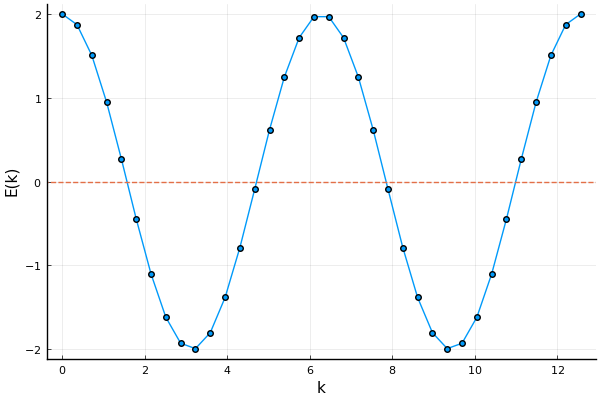

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
pythonplot()
a=1
t=1
k = LinRange(0,4*pi, 36)
E = @. (2*t*cos(k*a))
plot(k,E, label="", marker=:circle, xlabel="k", ylabel="E(k)")
hline!([0], linestyle=:dash, label="")

In [15]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_herm.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_herm.pdf"

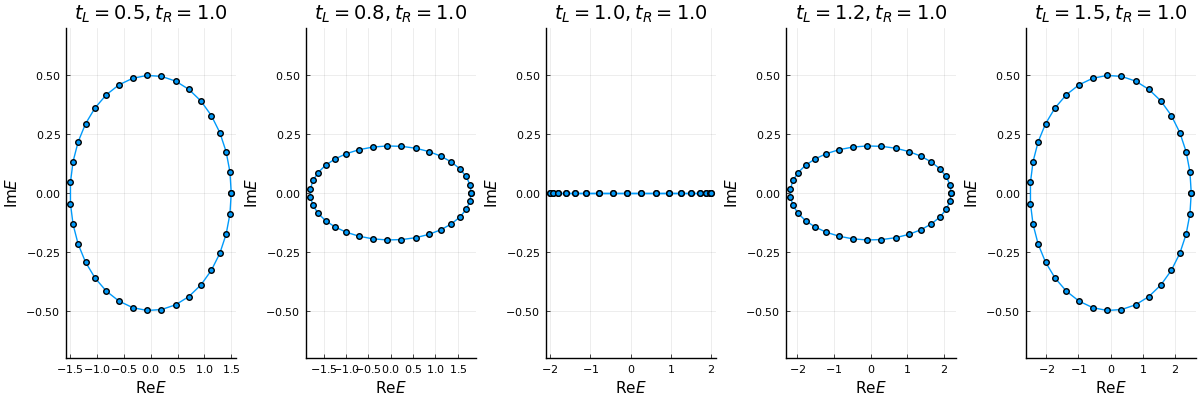

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [31]:
tl = [0.5,0.8,1.0,1.2,1.5]
tri = 1.0
k = LinRange(0,2*pi, 36)
p=[]
for tle in tl
Ere = @. (tle +tri)*cos(k) 
Eim = @. (tle -tri)*sin(k) 
p1 = plot(Ere, Eim, marker=:circle, xlabel=L"\mathrm{Re} E", ylabel=L"\mathrm{Im}E", label="", ylim=(-0.7,0.7), title=L"t_L=%$tle, t_R= %$tri")
push!(p,p1)
end
plot!(p..., layout=(1,5), size=(1200,400))

In [32]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_Ek.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_Ek.pdf"

In [139]:
function HN_ham(N::Int64, jl::Float64,jr::Float64, str)
    tup = jl*ones(N-1)
    tdown = jr*ones(N-1)
    H = Tridiagonal(tdown, zeros(N), tup)
    H = Matrix(H)
    if(str=="pbc") 
        H[1,end] = jr
        H[end,1] = jl
    end
    return H
end

HN_ham (generic function with 2 methods)

In [140]:
N=100
tle = 1.5
tre = 0.5
H1 = HN_ham(N, tle, tre, "obc")
E1,V1 = eigen(H1);
tle = 0.5
tre = 1.5
H2 = HN_ham(N, tle, tre,"obc")
E2,V2 = eigen(H2);

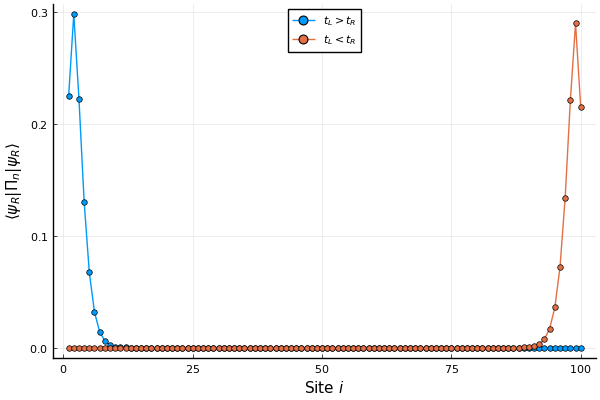

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [141]:
plot()
plot!(abs2.(V1[:,2]), marker=:circle, label=L"t_L>t_R", msw=0.5)
plot!(abs2.(V2[:,2]), marker=:circle, label=L"t_L<t_R", legend=:top, msw=0.5)
plot!(ylabel=L"\langle \psi_R |\Pi_n | \psi_R \rangle")
plot!(xlabel=L"Site $i$")

In [138]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_skin.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_skin.pdf"

In [145]:
H = HN_ham(50,0.6,1.0,"pbc");
H1 = HN_ham(50,0.6,1.0,"obc");

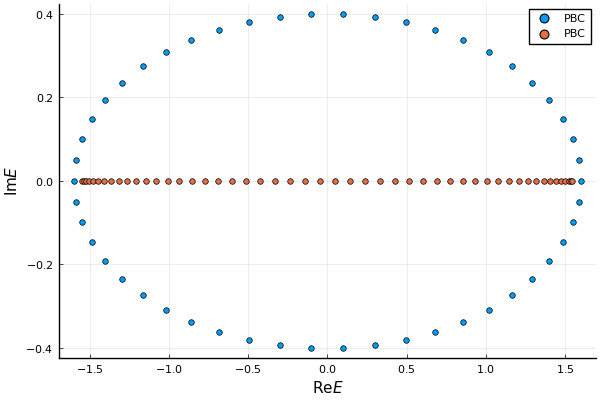

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [151]:
E = eigvals(H)
E1 = eigvals(H1);
scatter(real.(E), imag.(E), label="PBC", marker=:circle, msw=0.5)
scatter!(real.(E1), imag.(E1), label="PBC", marker=:circle, xlabel=L"\mathrm{Re}E",ylabel=L"\mathrm{Im}E", msw=0.5)

In [152]:
savefig("../PAPERS/FIGS_MANUS_NHSE/E_pbc_obc.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/E_pbc_obc.pdf"

In [204]:
N=100
tle = 0.8
tre = 0.5
H1 = HN_ham(N, tle, tre, "obc")
cH1 = H1'
E1,V1 = eigen(H1)
E2,V2 = eigen(cH1)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
100-element Vector{Float64}:
 -1.2642992039178058
 -1.26246421708469
 -1.259407876211606
 -1.2551331375326595
 -1.2496441510625587
 -1.2429461834563647
 -1.235045802618742
 -1.225950507978639
 -1.215669301587231
 -1.204211873315115
 -1.191589602742093
 -1.1778143887739907
 -1.162899863513073
  ⋮
  1.1778143896946272
  1.1915896003271118
  1.2042118751681994
  1.2156693023124303
  1.2259505031187543
  1.235045812193181
  1.2429461699362814
  1.2496441664599864
  1.2551331230647211
  1.2594078871352135
  1.2624642110837434
  1.2642992056248317
vectors:
100×100 Matrix{Float64}:
  1.4302e-11   -1.46588e-11  -1.52358e-11  …  -1.46589e-11  -1.4302e-11
 -3.61635e-11   3.70129e-11   3.83756e-11     -3.70125e-11  -3.61639e-11
  6.85596e-11  -7.00009e-11  -7.22837e-11     -6.99998e-11  -6.8561e-11
 -1.15498e-10   1.17527e-10   1.20668e-10     -1.17525e-10  -1.155e-10
  1.82353e-10  -1.84745e-10  -1.88287e-10     -1.84743e-10  -1.8

In [208]:
bi = zeros(N) 
for i in eachindex(E1)
    for j in eachindex(E2)
        if(abs(E1[i]-conj(E2[j]))<1e-7)
            bi[i] = V1[:,i]'*V2[:,j]
        end
    end
end

In [209]:
bi

100-element Vector{Float64}:
  1.35668729324432e-7
 -3.5669477963726e-8
 -1.7151141043343392e-8
  1.0669750991922921e-8
 -7.669859505784792e-9
  6.0403233194924056e-9
 -5.057833212039071e-9
  4.420202794376351e-9
 -3.983112704420461e-9
  3.6705170218751298e-9
 -3.4392962803517042e-9
 -3.2634937468991057e-9
 -3.1267417964081664e-9
  ⋮
  3.26349391710489e-9
  3.439296012710048e-9
  3.670517480604948e-9
  3.983111941989413e-9
 -4.4202039305753984e-9
 -5.0578317739673786e-9
  6.04032468486212e-9
 -7.669859213063093e-9
 -1.066974768907737e-8
 -1.71511549792416e-8
  3.566942829768389e-8
 -1.356689840010003e-7

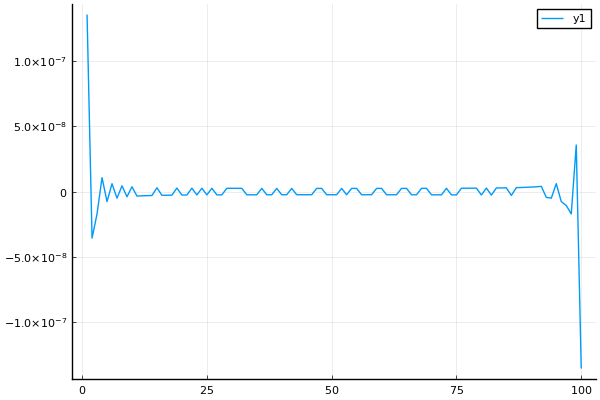

In [210]:
plot(bi)